# Think Bayes: Chapter 8

Note: this exercise has been taken from the Think Bayes [book](http://www.greenteapress.com/thinkbayes/thinkbayes.pdf)

In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

import os, sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

** Question **

Unstable particles are emitted from a source and decay at a distance x, a
real number that has an exponential probability distribution with [parameter]
λ. Decay events can only be observed if they occur in a window
extending from x = 1 cm to x = 20 cm. N decays are observed at
locations {1.5, 2, 3, 4, 5, 12} cm. What is the posterior distribution of
λ?

** Solution **

During the hockey problem, where the exponential distribution described the time between goals (in games), the $\lambda$ parameter described the average number of goals per game.

Here, the exponential distribution describes the 'distance between decay events', so analogously the $\lambda$ parameter would describe the average number of decay events per unit distance.

A decay event will only be observed if it occurs between 1 and 20 cm from the decay source; without more information, I'll assume my posterior of $\lambda$ to be a uniform distribution between $\frac{1}{20}$ and 1.

In [2]:
from thinkbayes2 import MakeExponentialPmf, MakeUniformPmf

In [3]:
def EvalExponentialPdf(x, lam):
    return lam * math.exp(-lam * x)

In [4]:
class ParticleLam(Suite):
    def __init__(self):
        pmf = MakeUniformPmf(low=1/20, high=1, n=101)
        Suite.__init__(self, pmf)
        
    def Likelihood(self, data, hypo):
        lam = hypo
        like = EvalExponentialPdf(x=data, lam=lam)
        return like

In [5]:
particle_lam = ParticleLam()
particle_lam.UpdateSet((1.5, 2, 3, 4, 5, 12))

6.3071025122425967e-08

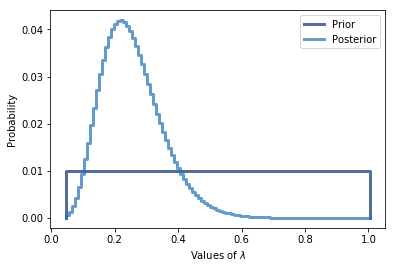

In [6]:
thinkplot.Pmf(MakeUniformPmf(low=1/20, high=1, n=101), label='Prior')
thinkplot.Pmf(particle_lam, label='Posterior')
thinkplot.Config(xlabel='Values of $\lambda$', ylabel='Probability')